In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
# Importa a biblioteca do sqlite, cria a conexão e o ponteiro
import sqlite3
con = sqlite3.connect("database\\indicadores.db")
cur = con.cursor()

In [3]:
# Pegando os dados relevantes presentes na database
df = pd.read_sql("SELECT * FROM region_df", con)
df2 = pd.read_sql("SELECT * FROM brazil_df", con)

In [4]:
# Criando a Lista de macro regiões
regions = ['Centro-Oeste','Nordeste','Norte','Sudeste','Sul']
df['region'].replace(['norte', 'nordeste', 'sudeste', 'sul', 'centro-oeste'],['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],inplace=True)
df.head()

,region,week_last_day,epidemiological_week,total_inhabitants,last_available_confirmed,last_available_deaths,new_week_cases,new_week_deaths,prevalence,mortality,lethality,incidence_cases,incidence_deaths,cases_growth_factor,deaths_growth_factor
0,Centro-Oeste,2020-03-07,10,3.052546e+06,1,0,1,0,0.032760,0.000000,0.000000,0.032760,0.000000,0.000000,0.0
1,Centro-Oeste,2020-03-14,11,5.720491e+06,14,0,13,0,0.244734,0.000000,0.000000,0.227253,0.000000,13.000000,0.0
2,Centro-Oeste,2020-03-21,12,7.549016e+06,142,0,128,0,1.881040,0.000000,0.000000,1.695585,0.000000,9.846154,0.0
3,Centro-Oeste,2020-03-28,13,8.933878e+06,323,1,181,1,3.615451,0.011193,0.309598,2.025996,0.011193,1.414062,0.0
4,Centro-Oeste,2020-04-04,14,1.044595e+07,641,11,318,10,6.136351,0.105304,1.716069,3.044243,0.095731,1.756906,10.0


In [5]:
# Obter os dados relevantes de cada macro_região e os armazená-los em uma lista de dataframes
def get_regions(macro_regiao, relevant_dataframe):
    output_df = []
    
    for i in range(len(macro_regiao)):
        output_df.append( relevant_dataframe[(relevant_dataframe['region']==macro_regiao[i])] )
        output_df[i].set_index('epidemiological_week', inplace=True)
    
    return output_df

In [6]:
# Encontrar o valor máximo de uma coluna numa lista de dataframes
def find_max(lista_de_dataframes,column):
    max_value = 0
    for i in range(0,len(lista_de_dataframes)):
        aux = lista_de_dataframes[i][column].max()
        if(aux>max_value):
            max_value = aux
    return max_value

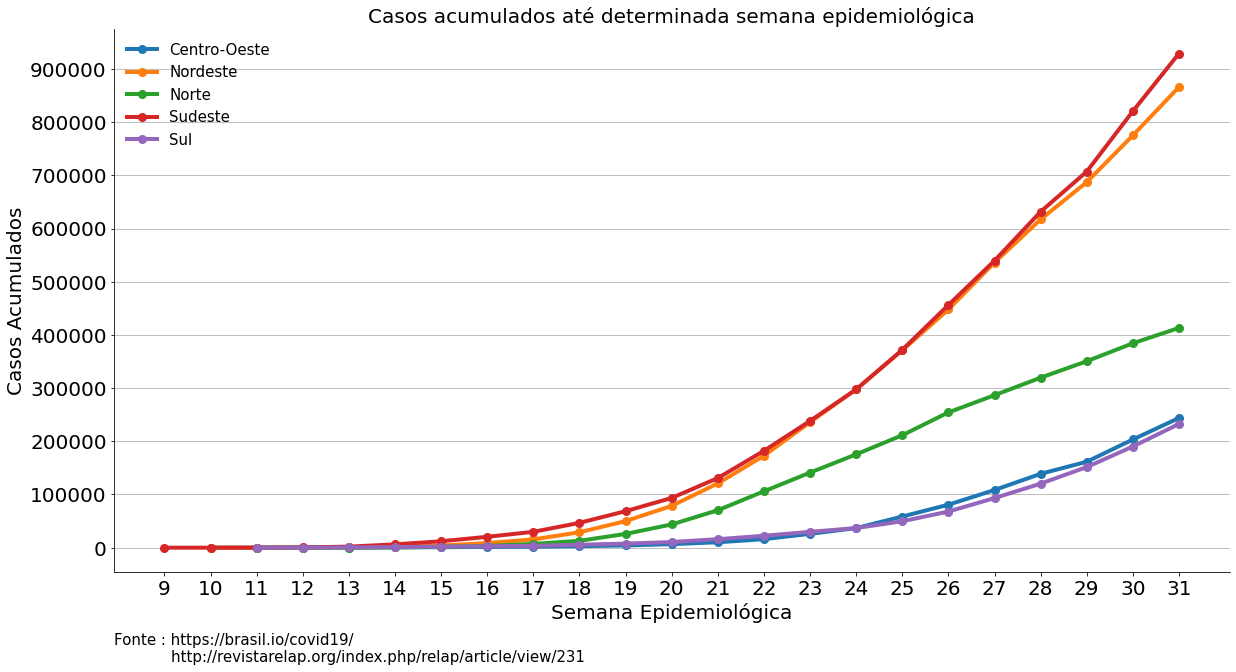

In [7]:
# -----------------------1------------------------------
# Casos acumulados até determinada semana epidemiológica
# ------------------------------------------------------
last_available_confirmed = df[['region','epidemiological_week','last_available_confirmed']].copy()
casos_acumulados = get_regions(regions, last_available_confirmed)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(casos_acumulados)):
    casos_acumulados[i]['last_available_confirmed'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Casos Acumulados',fontsize=20);
plt.title('Casos acumulados até determinada semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions, loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(casos_acumulados,'last_available_confirmed')
plt.yticks(np.arange(0,max_value,100000))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/casos_acumulados.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

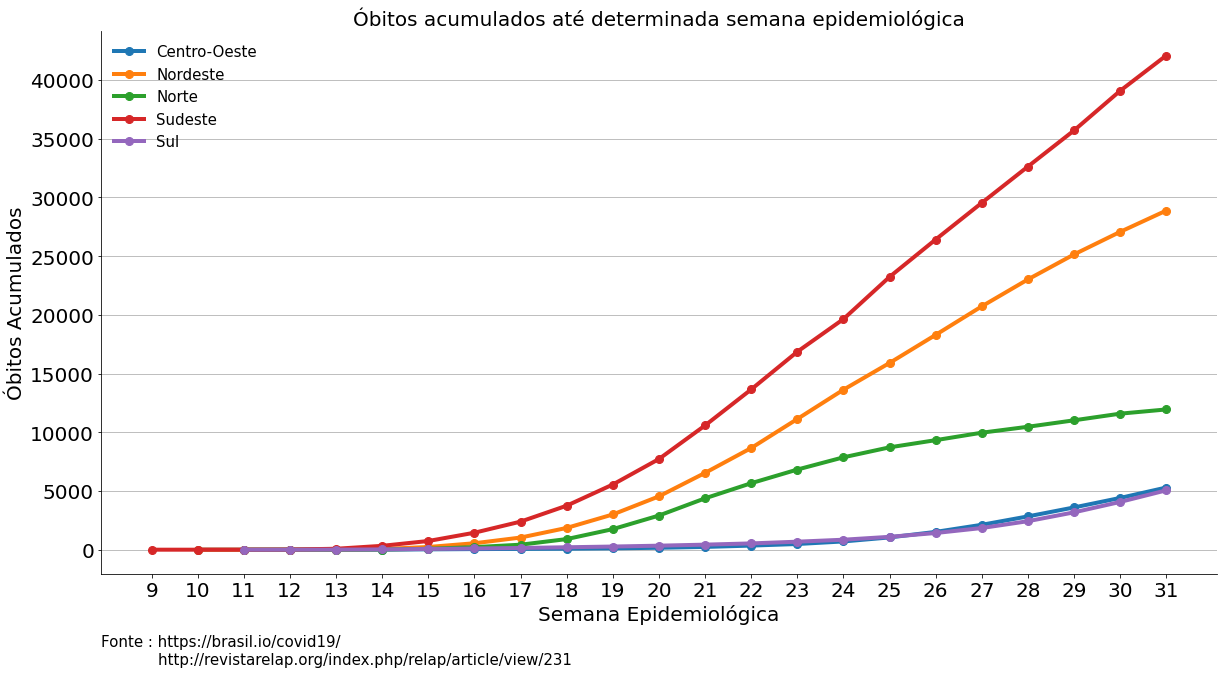

In [8]:
# ------------------------2------------------------------
# Óbitos acumulados até determinada semana epidemiológica
# -------------------------------------------------------
last_available_deaths = df[['region','epidemiological_week','last_available_deaths']].copy()
obitos_acumulados = get_regions(regions, last_available_deaths)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(obitos_acumulados)):
    obitos_acumulados[i]['last_available_deaths'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Óbitos Acumulados',fontsize=20);
plt.title('Óbitos acumulados até determinada semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions, loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(obitos_acumulados,'last_available_deaths')
plt.yticks(np.arange(0,max_value,5000))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/obitos_acumulados.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

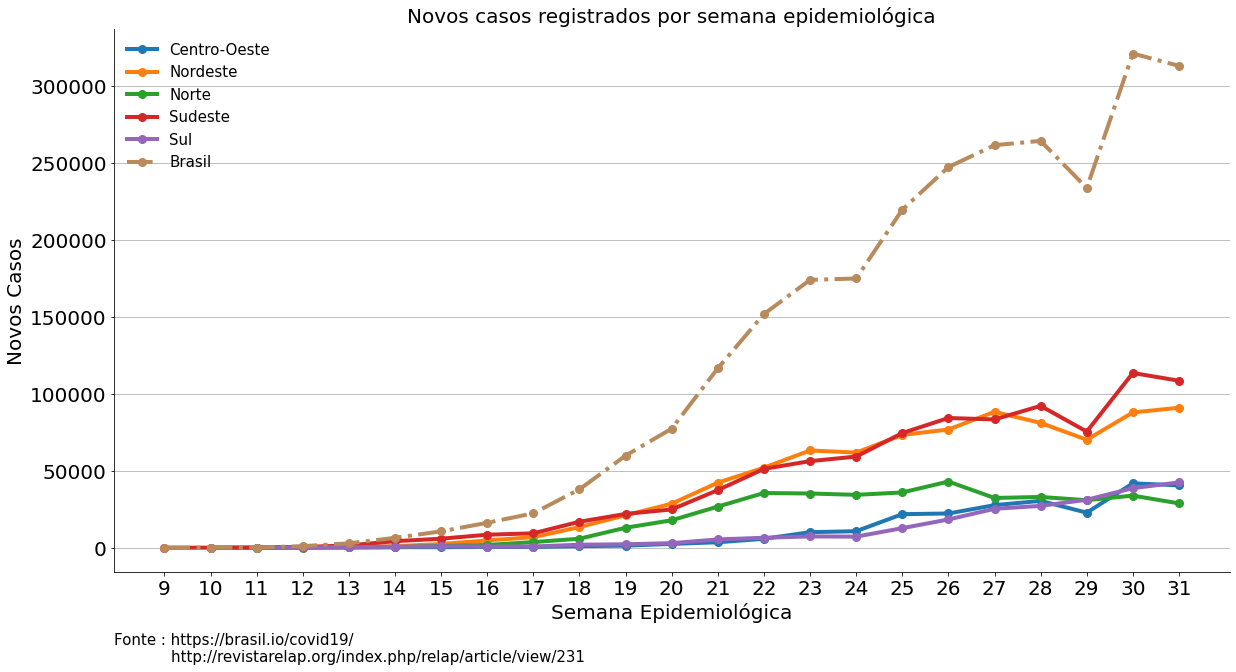

In [9]:
# -----------------3----------------------
# Novos casos em uma semana epidemiológica
# ----------------------------------------
new_week_cases = df[['region','epidemiological_week','new_week_cases']].copy()
novos_casos = get_regions(regions, new_week_cases)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(novos_casos)):
    novos_casos[i]['new_week_cases'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
    
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['new_week_cases'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8,linestyle='-.')

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Novos Casos',fontsize=20);
plt.title('Novos casos registrados por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(novos_casos+[df2.set_index('epidemiological_week')],'new_week_cases')
plt.yticks(np.arange(0,max_value,50000))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/novos_casos.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

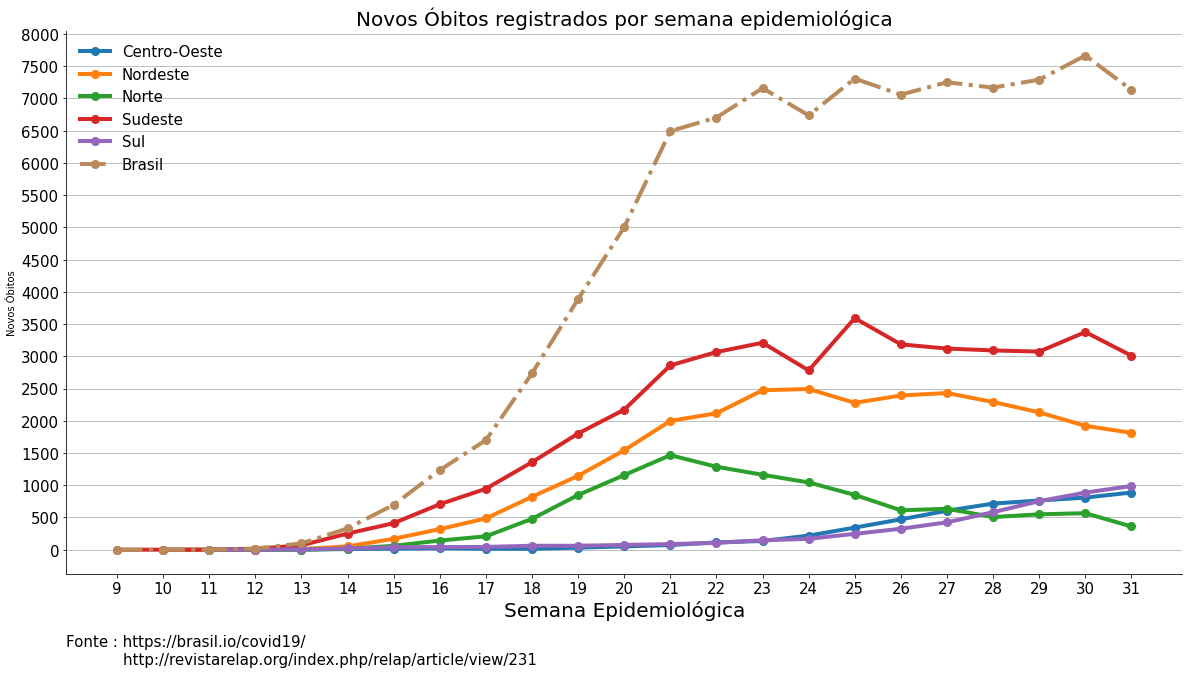

In [10]:
# ------------------4----------------------
# Novos óbitos em uma semana epidemiológica
# -----------------------------------------
new_week_deaths	 = df[['region','epidemiological_week','new_week_deaths']].copy()
novos_obitos = get_regions(regions, new_week_deaths)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(novos_obitos)):
    novos_obitos[i]['new_week_deaths'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
    
# Adicionando a "linha" referente ao Brasil ao gráfico
df2.set_index('epidemiological_week')['new_week_deaths'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=15, marker = 'o',markersize=8,linestyle='-.')

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Novos Óbitos',fontsize=10);
plt.title('Novos Óbitos registrados por semana epidemiológica',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,8001,500))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/novos_obitos.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

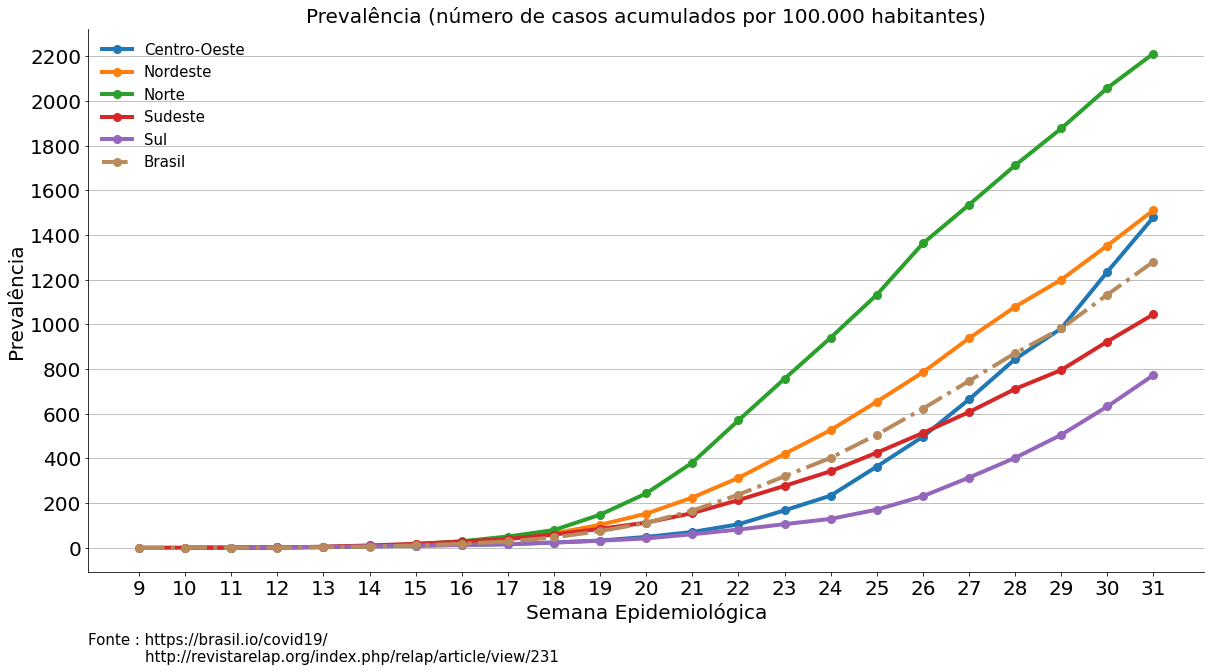

In [11]:
# ----5------
# Prevalência
# -----------
prevalence = df[['region','epidemiological_week','prevalence']].copy()
prevalencia = get_regions(regions, prevalence)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(prevalencia)):
    prevalencia[i]['prevalence'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
    
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['prevalence'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8,linestyle='-.')

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Prevalência',fontsize=20);
plt.title('Prevalência (número de casos acumulados por 100.000 habitantes)',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
max_value = find_max(prevalencia+[df2.set_index('epidemiological_week')],'prevalence')
plt.yticks(np.arange(0,max_value,200))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/prevalencia.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

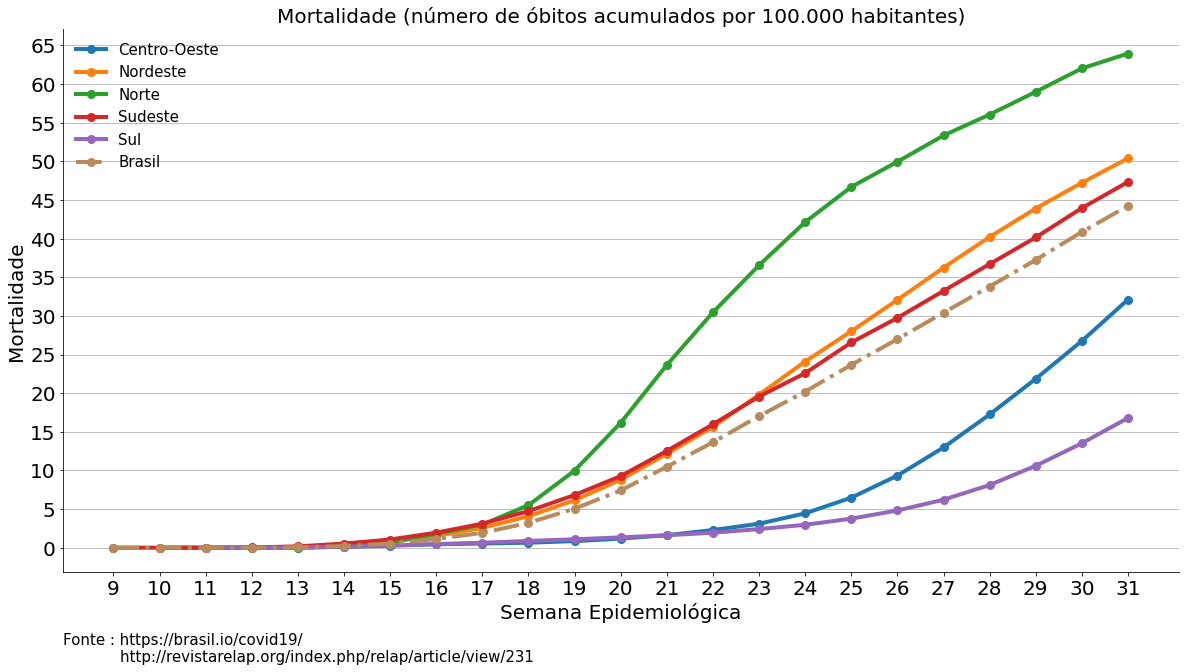

In [12]:
# ----6------
# Mortalidade
# -----------
mortality = df[['region','epidemiological_week','mortality']].copy()
mortalidade = get_regions(regions, mortality)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(mortalidade)):
    mortalidade[i]['mortality'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
    
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['mortality'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8,linestyle='-.')

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Mortalidade',fontsize=20);
plt.title('Mortalidade (número de óbitos acumulados por 100.000 habitantes)',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,70,5))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/mortalidade.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()


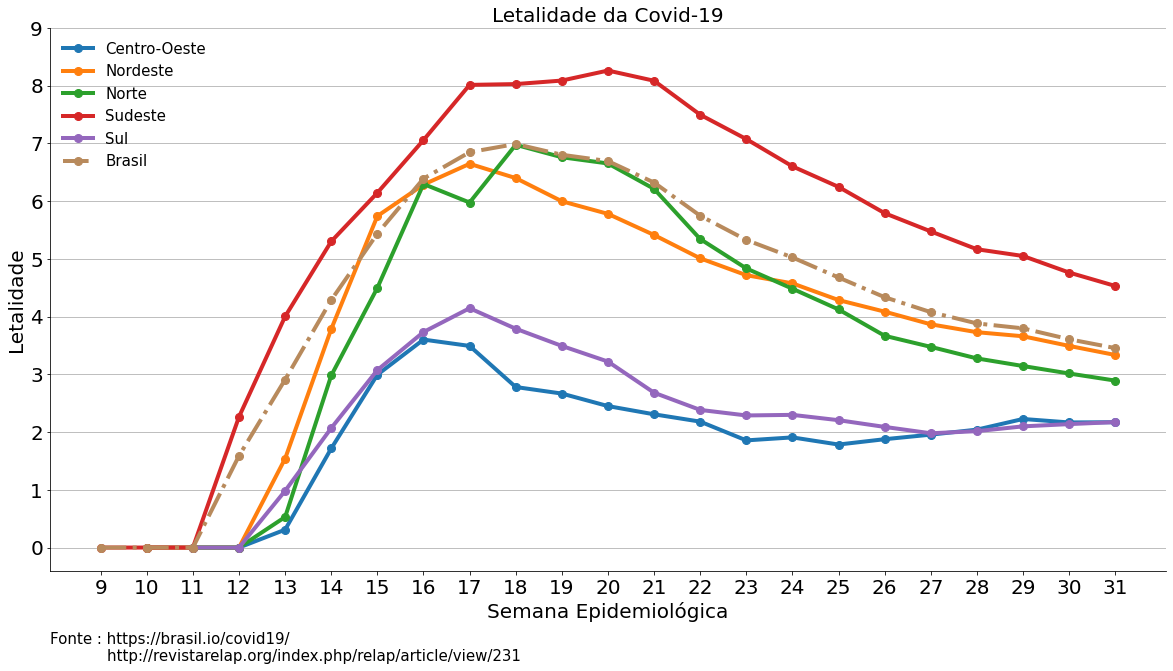

In [13]:
# ----7-----
# Letalidade
# ----------
lethality = df[['region','epidemiological_week','lethality']].copy()
letalidade = get_regions(regions, lethality)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(letalidade)):
    letalidade[i]['lethality'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
    
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['lethality'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8,linestyle='-.')
# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Letalidade',fontsize=20);
plt.title('Letalidade da Covid-19',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,10,1))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/letalidade.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()


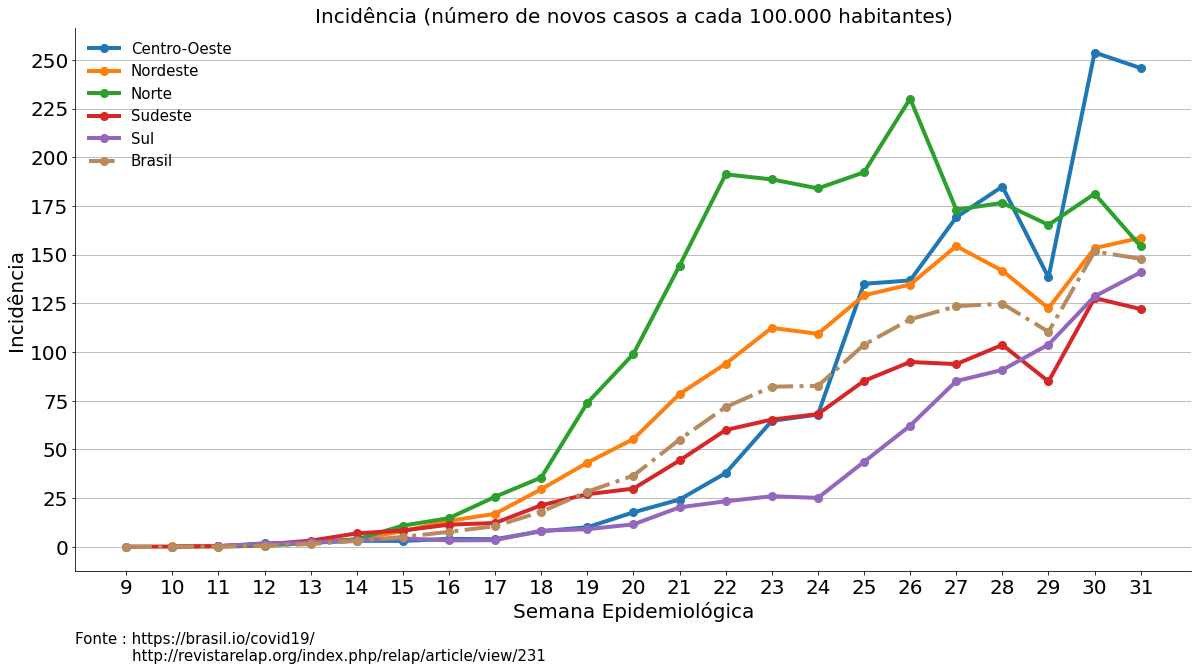

In [14]:
# --------------------8----------------------------
# Incidência (Novos casos a cada 100mil habitantes)
# -------------------------------------------------
incidence_cases = df[['region','epidemiological_week','incidence_cases']].copy()
incidencia = get_regions(regions, incidence_cases)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(incidencia)):
    incidencia[i]['incidence_cases'].plot.line(figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8)
    
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['incidence_cases'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=4, fontsize=20, marker = 'o',markersize=8,linestyle="-.")

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Incidência',fontsize=20);
plt.title('Incidência (número de novos casos a cada 100.000 habitantes)',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.xticks(np.arange(9,32,1))
plt.yticks(np.arange(0,251,25))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/incidencia.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()

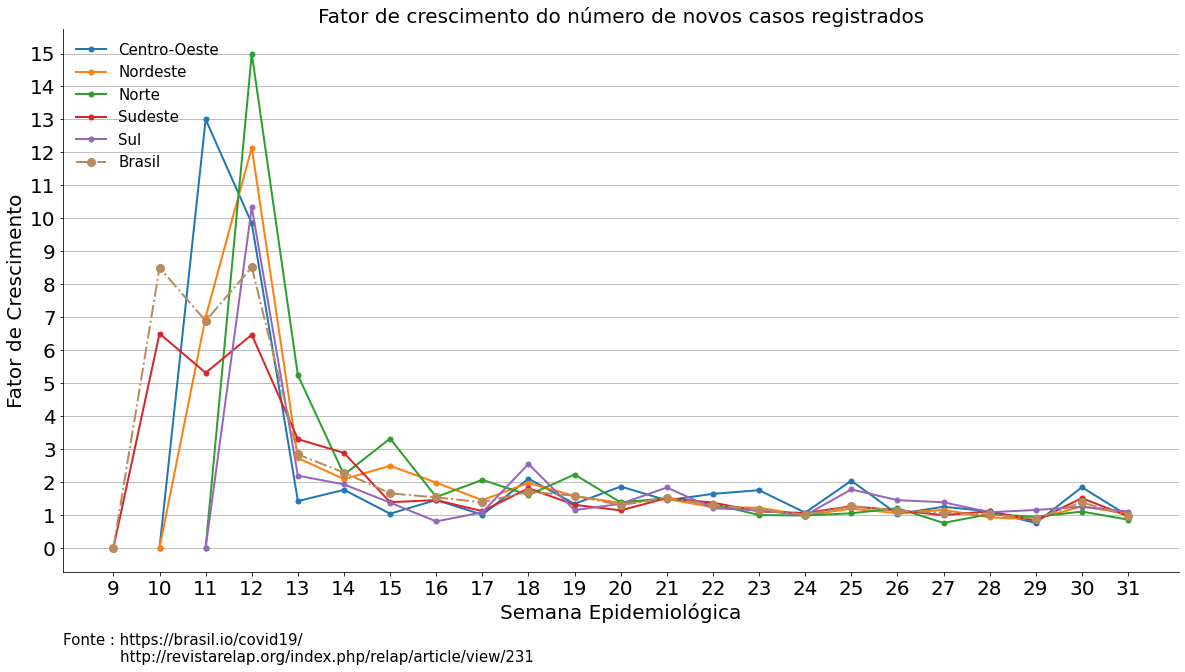

In [15]:
# -------------------------------------------9---------------------------------------------------
# Fator de Crescimento (Do número de novos casos entre duas semanas epidemiológicas consecutivas)
# -----------------------------------------------------------------------------------------------
cases_growth_factor = df[['region','epidemiological_week','cases_growth_factor']].copy()
fator_de_crescimento = get_regions(regions, cases_growth_factor)

# Adicionando as "linhas" referentes a cada macro-região ao gráfico
for i in range(len(fator_de_crescimento)):
    fator_de_crescimento[i]['cases_growth_factor'].plot.line(figsize=(20,10), linewidth=2, fontsize=20, marker = 'o',markersize=5)
# Adicionando as "linhas" referentes ao Brasil ao gráfico
df2.set_index('epidemiological_week')['cases_growth_factor'].plot.line(color = '#b88a5c',figsize=(20,10), linewidth=2, fontsize=20, marker = 'o',markersize=8,linestyle='-.')

# Título do gráfico e rótulos dos eixo X e Y
plt.xlabel('Semana Epidemiológica', fontsize=20);
plt.ylabel('Fator de Crescimento',fontsize=20);
plt.title('Fator de crescimento do número de novos casos registrados',fontsize=20);

# Adicionando a legenda no campo superior esquerdo
plt.legend(regions+['Brasil'], loc='upper left', fontsize = 15, frameon=False)

# Colocando limites e intervalos do eixo X e Y
plt.yticks(np.arange(0,16,1))
plt.xticks(np.arange(9,32,1))

#Tirando bordas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adicionando grid para facilitar visualização
plt.grid(axis='y')

# Adicionando footnote com fonte dos dados
plt.annotate('Fonte : https://brasil.io/covid19/ \n            http://revistarelap.org/index.php/relap/article/view/231', (0,0), (0, -60), xycoords='axes fraction', textcoords='offset points', va='top',fontsize = 15)

# Salvando o gráfico em imagem
plt.savefig("Gráficos/fator_de_crescimento.svg")

# Mostre o plot e feche-o para uso posterior
plt.show()
plt.close()